# Kolmogorov Smirnov

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

$ H_0: $ The both distributions are the same (Same distribution means same famility of distribution and same parameters).

$ H_1: $ Otherwise.

$ \ $

We have two distributions $ F_1(\cdot) $ and $ F_2(\cdot) $ and we define:

$ \boxed{D = \sup_{1 \leq i \leq n} | F_1(x_i) - F_2(x_i)|} $

Now D is the statistic which distributes different in accordance with the distribution of $ F_1(\cdot) $ and $ F_2(\cdot) $.

**To test if the data follows a particular distribution we can make a sample of that distribution and apply the hypothesis test.**

In [4]:
start = time.time()

# 1. Load dataset

In [5]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/'
       'Estadistica-machine-learning-python/master/data/Snmesp.csv')

In [6]:
df = pd.read_csv(url)

# 2. Histogram of the data to compare

### i. Salary

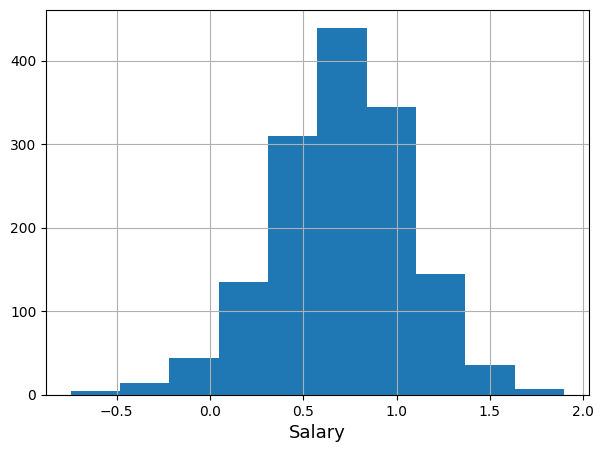

In [7]:
plt.figure(figsize = (7, 5))
df['salary'].hist()
plt.xlabel('Salary', fontsize = 13)
plt.show()

### ii. Comparison of histograms for the two years

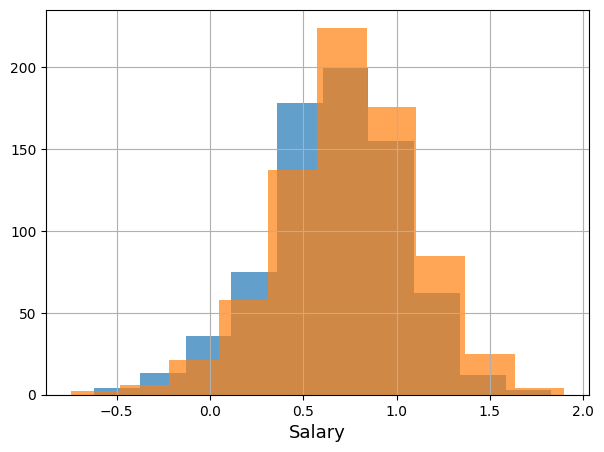

In [8]:
plt.figure(figsize = (7, 5))
df[df['year'] == 1989]['salary'].hist(alpha = 0.7)
df[df['year'] == 1990]['salary'].hist(alpha = 0.7)
plt.xlabel('Salary', fontsize = 13)
plt.show()

# 3. Compute the CDF (Cumulative distribution function)

In [9]:
ecdf_1989 = ECDF(df[df['year'] == 1989]['salary'])
ecdf_1990 = ECDF(df[df['year'] == 1990]['salary'])

In [10]:
grid_salary = np.sort(df['salary'].unique())

In [11]:
prob_ecdf_1989 = ecdf_1989(grid_salary)
prob_ecdf_1990 = ecdf_1990(grid_salary)

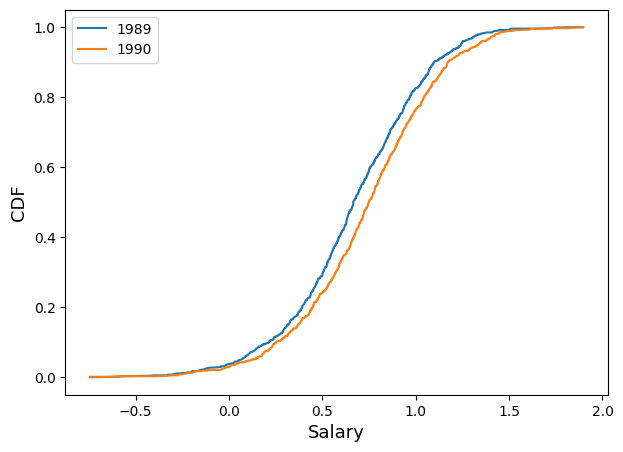

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 5))
ax.plot(grid_salary, prob_ecdf_1989, label='1989')
ax.plot(grid_salary, prob_ecdf_1990, label='1990')
ax.set_ylabel("CDF", fontsize = 13)
ax.set_xlabel("Salary", fontsize = 13)
ax.legend()
plt.show()

# 4. Compute the statistics

In [13]:
abs_diff = np.abs(prob_ecdf_1989 - prob_ecdf_1990)
ks_statistics = np.max(abs_diff)

In [14]:
print('KS statistics:', ks_statistics)

KS statistics: 0.10569105691056907


# 5. Hipothesis test

In [15]:
from scipy.stats import ks_2samp

In [16]:
ht_info = ks_2samp(
    df[df['year'] == 1989]['salary'],
    df[df['year'] == 1990]['salary']
)

In [17]:
ht_info

KstestResult(statistic=0.10569105691056911, pvalue=0.0005205845230085144, statistic_location=0.6692902, statistic_sign=1)

In [18]:
ht_info.statistic

0.10569105691056911

In [19]:
round(ht_info.pvalue*100, 2)

0.05

**Comments:** How $ p_{value} < 0.05 $ then we **can reject the null hypothesis**. For this reason we can say that the both data don't have the same distribution.

### Time of execution

In [20]:
end = time.time()

In [21]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
